# Prosper Loan Data Exploration
## by Ismail Adamu

## Introduction
> Introduce the dataset
This data set contains 113,937 loans, each with 81 variables including loan amount, borrower rate (or interest rate), current loan status, borrower income, among others.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Load data set
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# examine the data dimension
df.shape

(113937, 81)

In [4]:
# check columns in dataset
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
# peeking at data
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
# variables info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [7]:
# select important variables for analysis
var =  ['LoanStatus','LoanOriginalAmount','BorrowerAPR', 'BorrowerRate','Term',
       'LenderYield','Occupation', 'EmploymentStatus','IsBorrowerHomeowner','IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome','MonthlyLoanPayment','Investors']

In [8]:
# sub set important variables 
df_loan = df[var]
df_loan.head()

,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,Term,LenderYield,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,Completed,9425,0.16516,0.1580,36,0.1380,Other,Self-employed,True,"$25,000-49,999",True,3083.333333,330.43,258
1,Current,10000,0.12016,0.0920,36,0.0820,Professional,Employed,False,"$50,000-74,999",True,6125.000000,318.93,1
2,Completed,3001,0.28269,0.2750,36,0.2400,Other,Not available,False,Not displayed,True,2083.333333,123.32,41
3,Current,10000,0.12528,0.0974,36,0.0874,Skilled Labor,Employed,True,"$25,000-49,999",True,2875.000000,321.45,158
4,Current,15000,0.24614,0.2085,36,0.1985,Executive,Employed,True,"$100,000+",True,9583.333333,563.97,20


In [9]:
# check details of subset variables
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
LoanStatus             113937 non-null object
LoanOriginalAmount     113937 non-null int64
BorrowerAPR            113912 non-null float64
BorrowerRate           113937 non-null float64
Term                   113937 non-null int64
LenderYield            113937 non-null float64
Occupation             110349 non-null object
EmploymentStatus       111682 non-null object
IsBorrowerHomeowner    113937 non-null bool
IncomeRange            113937 non-null object
IncomeVerifiable       113937 non-null bool
StatedMonthlyIncome    113937 non-null float64
MonthlyLoanPayment     113937 non-null float64
Investors              113937 non-null int64
dtypes: bool(2), float64(5), int64(3), object(4)
memory usage: 10.6+ MB


In [10]:
# check null values
df_loan.isnull().sum()

LoanStatus                0
LoanOriginalAmount        0
BorrowerAPR              25
BorrowerRate              0
Term                      0
LenderYield               0
Occupation             3588
EmploymentStatus       2255
IsBorrowerHomeowner       0
IncomeRange               0
IncomeVerifiable          0
StatedMonthlyIncome       0
MonthlyLoanPayment        0
Investors                 0
dtype: int64

### What is the structure of your dataset?

> The dataset contains 113,937 loans and 81 features. The majority of variables have a numeric nature, but there are also dates, strings, and booleans.

### What is/are the main feature(s) of interest in your dataset?

> Although interest rate, security, and term are a loan's three main characteristics, I am more curious to see how income range and loan status, as well as borrower APR and loan amount, are related.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The loan amount, interest rate, borrower APR, and monthly loan payment are additional intriguing factors. The most crucial consideration when determining the monthly loan payment should be the loan's original amount.

## Univariate Exploration




#### What is the Distribution of Loan status?

In [11]:
# check loan status count
df_loan['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

Text(0.5,1,'Distribution of Loan status')

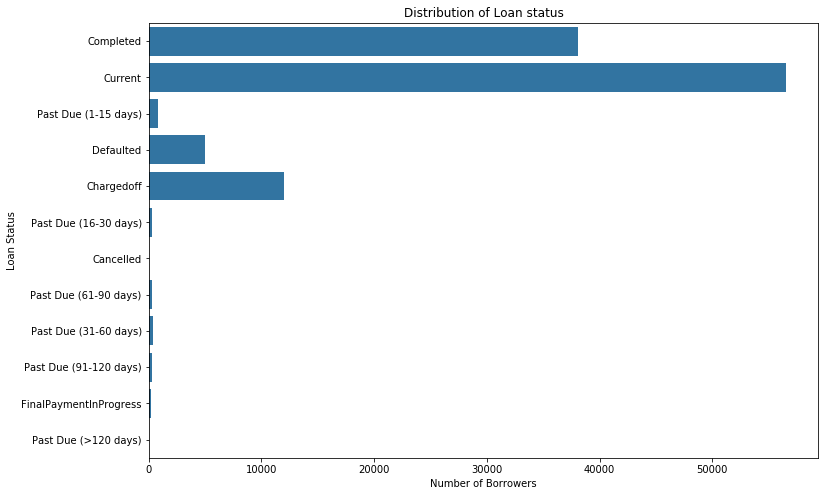

In [12]:
# Loan status Visualization
plt.figure(figsize=(12,8))
b_color = sb.color_palette()[0]
sb.countplot(data=df_loan, y='LoanStatus',color=b_color)
plt.xlabel('Number of Borrowers')
plt.ylabel('Loan Status')
plt.title('Distribution of Loan status')

The above plot demonstrates that completed loans are highest followed by current loans in terms of importance. Compared to current and completed loans, the number of defaulted loans is significantly lower. Loan cancellations are extremely rare.

#### What is the Distribution of Loan Term?

Text(0.5,1,'Distribution of Loans Terms ')

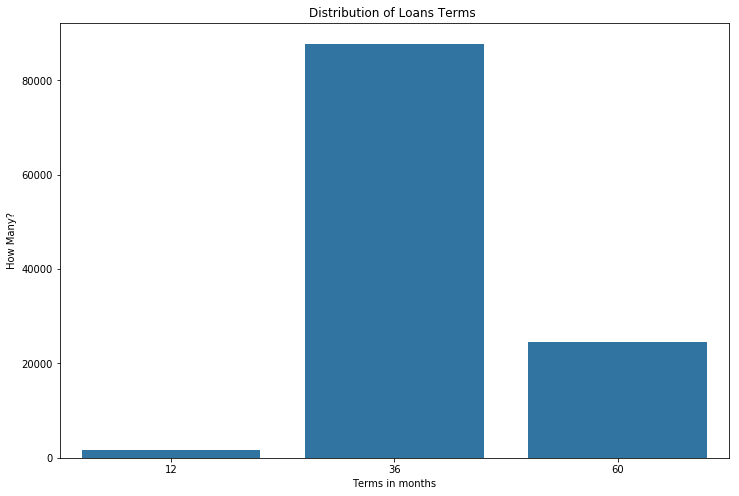

In [13]:
# Term Visualization
plt.figure(figsize=(12,8))
sb.countplot(data=df_loan, x='Term', color=b_color)
plt.xlabel('Terms in months')
plt.ylabel('How Many?')
plt.title('Distribution of Loans Terms ')

Although some choose 60 months, it is clear that the most popular loan term is 36 months and that borrowers rarely take out loans for terms of less than 12 months.

#### What is the Distribution of Employment status?

Text(0.5,1,'Distribution of Borrowers Employment Status')

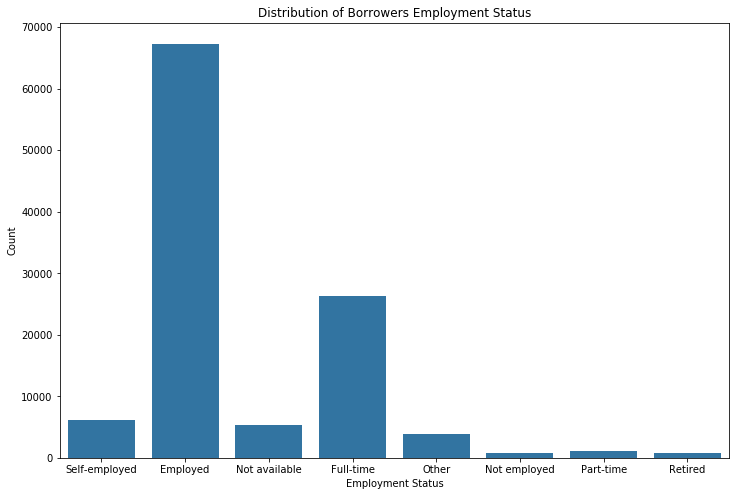

In [14]:
# visualization of Employment status
plt.figure(figsize=(12,8))
sb.countplot(data=df_loan, x='EmploymentStatus', color=b_color)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Borrowers Employment Status')

We can see that the majority of the borrowers are employed; a sizable proportion of them work full-time, and the remaining borrowers are dispersed throughout the chart.

#### What is the Distribution of Income Range?

In [15]:
df_loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

Let's combine the "Not employed," "Not displayed," and "$0" categories to simplify our visualization.

In [16]:
# combine  "Not employed" and "Not displayed," to "$0"
df_loan['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [17]:
df_loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$0                 9168
$1-24,999          7274
Name: IncomeRange, dtype: int64

In [18]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df_loan['IncomeRange'] = df_loan['IncomeRange'].astype(ordered_var)

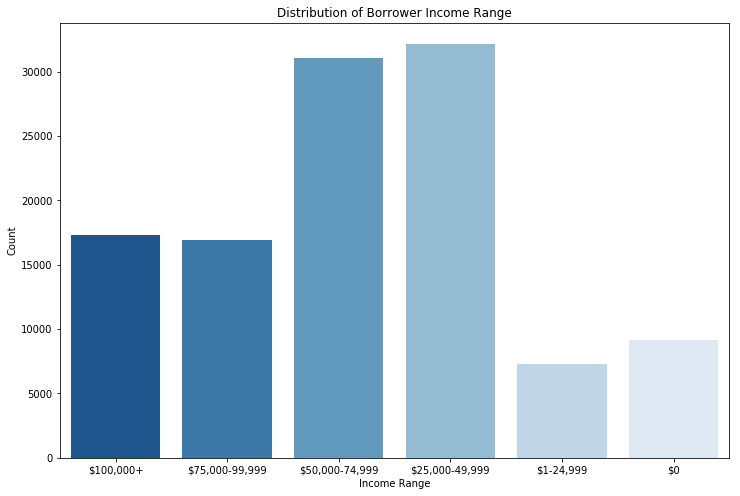

In [19]:
# bar chart
plt.figure(figsize =(12,8))
sb.countplot(data = df_loan, x = 'IncomeRange', palette = "Blues_r")
plt.ylabel('Count')
plt.xlabel('Income Range')
plt.title('Distribution of Borrower Income Range');

The two ranges with the most borrowers are $25k–$49k and $50k–$74k; they both have nearly the same number of borrowers.Borrowing is also common among those with incomes of at least $100,000 and no source of income.

#### What is the Distribution of Borrower APR and Interest Rate?

In [20]:
df_loan['BorrowerAPR'].describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

Text(0.5,1,'Distribution of Borrower APR')

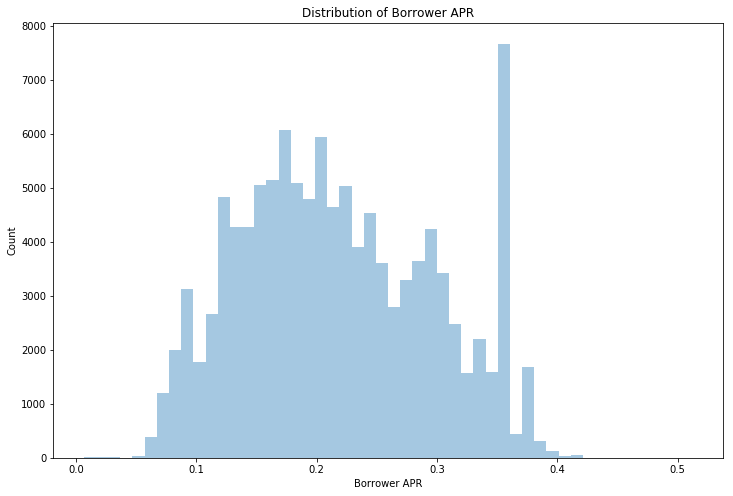

In [21]:
plt.figure(figsize=(12,8))
sb.distplot(df_loan.BorrowerAPR.dropna(), kde=False)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR')

In [22]:
df_loan['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

Text(0.5,1,'Distribution of Borrower Rate')

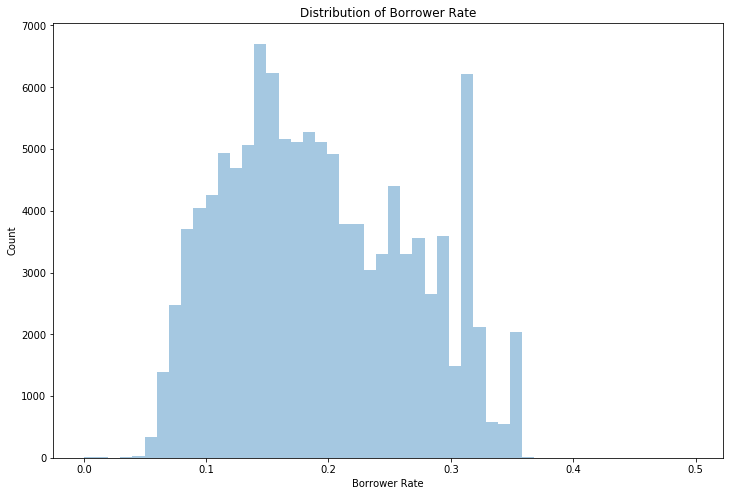

In [23]:
plt.figure(figsize=(12,8))
sb.distplot(df_loan.BorrowerRate, kde=False)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Distribution of Borrower Rate')

Each distribution has multiple modes. While borrower rate and borrower APR are comparable, we think borrower APR also includes additional fees (Discount points, Closing costs, mortgage insurance and loan origination fees). therefore, the borrower's APR exceeds the borrower's rate.

#### Is Borrower a Home owner?

In [24]:
# check counts
df_loan['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

Text(0.5,1,'Distribution of Home owners')

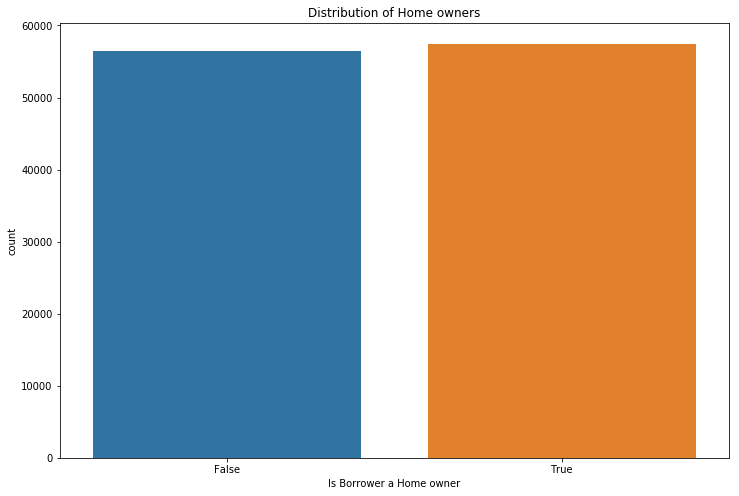

In [25]:
# plot 
plt.figure(figsize=(12,8))
sb.countplot(data=df_loan, x='IsBorrowerHomeowner')
plt.xlabel('Is Borrower a Home owner')
plt.title('Distribution of Home owners')

We can see that the number of borrowers with and without homes is nearly equal.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The two income brackets with the greatest number of borrowers are 25k-49k and 50k-74k; they both have nearly the same numbers of borrowers. The number of borrowers with incomes between 75k and 99k and 100,000k+ is nearly equal. People with incomes between 1dollar and 25k borrow the least money. It's surprising to see that borrowers with incomes of 0 dollar borrow more than those with incomes between 1 and 25,000.
Also, The Loan status distribution demonstrates that completed loans are highest followed by current loans in terms of importance. Compared to current and completed loans, the number of defaulted loans is significantly lower. Loan cancellations are extremely rare.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We combined several rows for various visuals where the categories seemed to be redundant in order to clean up our visualization. For instance, "Not employed" and "Not displayed" both have income ranges that are roughly equal to "0."

## Bivariate Exploration



#### What is the relationship between Income Range and Loan Status?

In [26]:
df_loan.head(2)

,LoanStatus,LoanOriginalAmount,BorrowerAPR,BorrowerRate,Term,LenderYield,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Investors
0,Completed,9425,0.16516,0.158,36,0.138,Other,Self-employed,True,"$25,000-49,999",True,3083.333333,330.43,258
1,Current,10000,0.12016,0.092,36,0.082,Professional,Employed,False,"$50,000-74,999",True,6125.000000,318.93,1


Text(0.5,1,'Relationship between Income Range and Loan Status')

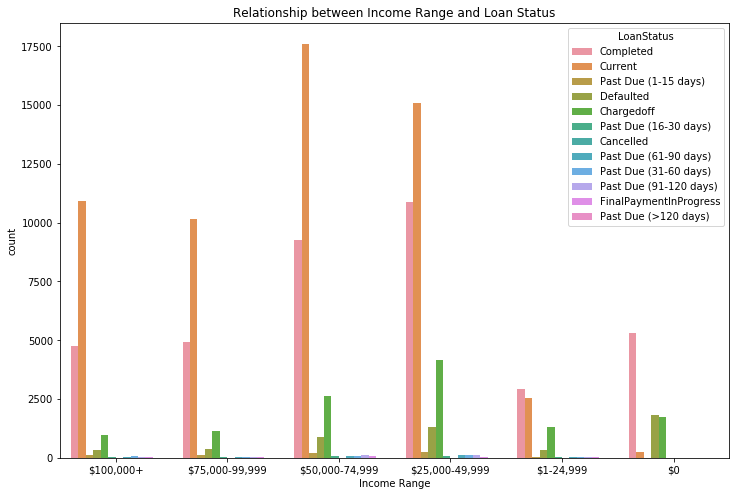

In [27]:
plt.figure(figsize=(12,8))
sb.countplot(data=df_loan, x='IncomeRange', hue='LoanStatus')
plt.xlabel('Income Range')
plt.title('Relationship between Income Range and Loan Status')

Although people with incomes of 0 dollar tend to default more frequently, it is surprising to see that the number of completed loans for income ranges of atleast 100,000  dollars and 75k-99k dollars is lower than 0 dollar. This suggests that the income range is unimportant for repaying a loan. The lowest completed loans belong to borrowers with incomes between 1 dollar and 25,000 dollars. For all income levels, the likelihood of a loan cancellation is typically very low.

#### What is the relationship between Loan Original Amount and Borrower APR

Text(0.5,1,'Reelationship between Loan Original Amount and Borrower APR')

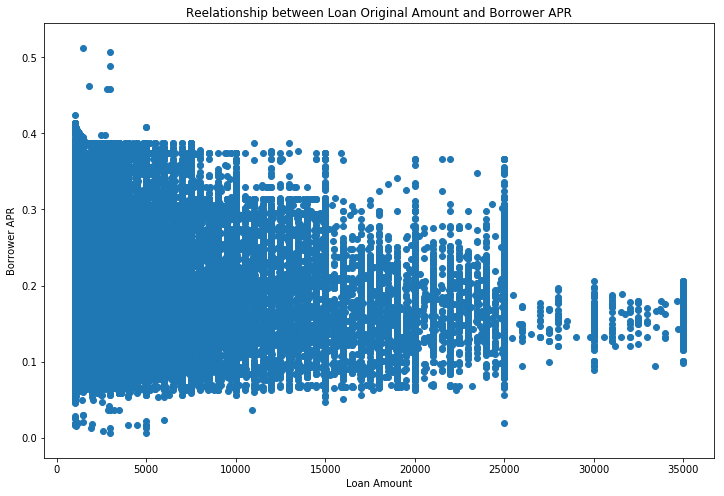

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(data=df_loan, x='LoanOriginalAmount', y='BorrowerAPR')
plt.xlabel('Loan Amount')
plt.ylabel('Borrower APR')
plt.title('Reelationship between Loan Original Amount and Borrower APR')

The graph demonstrates that the borrower's APR has a wide distribution at various total loan amounts, but that as loan amounts rise, the range of APR contracts. This suggests that the APR and the initial loan amount have a negative correlation.

#### What is the relationship between Term and Loan Status?

Text(0.5,1,'Relationship between Term and Loan Status')

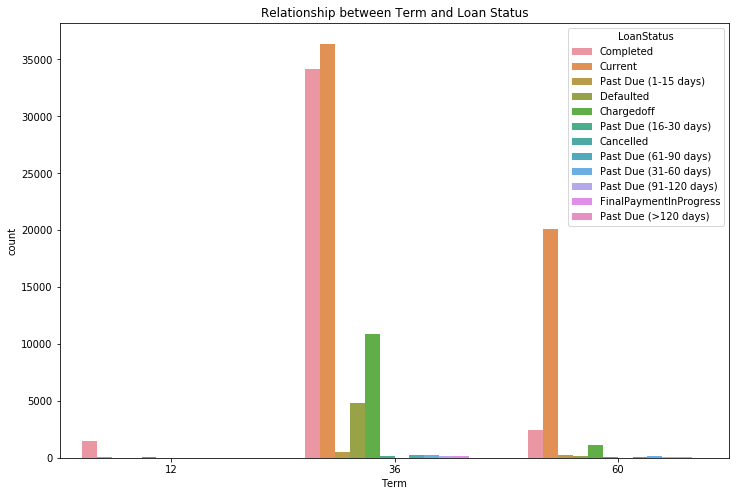

In [29]:
plt.figure(figsize=(12,8))
sb.countplot(data=df_loan, x='Term', hue='LoanStatus')
plt.title('Relationship between Term and Loan Status')

Despite the fact that loans with 12-month terms see very little activity, borrowers tend to favor the 36-month term more frequently. Borrowers  select a term of 60 months as well.

#### What is the Relationship between Borrower Rate and Borrower APR by Income Range?

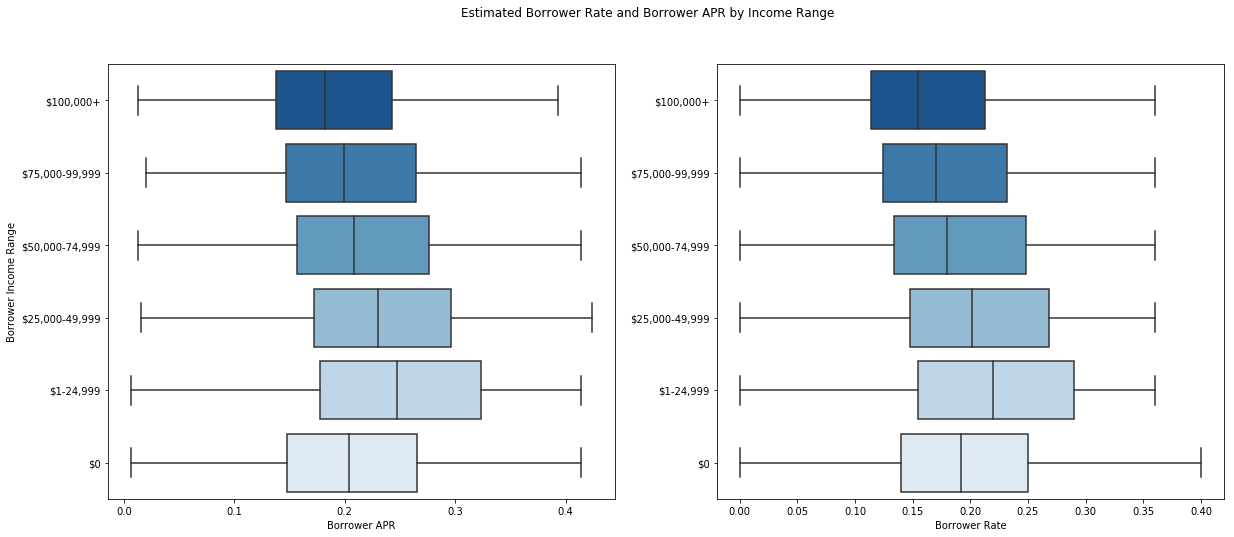

In [30]:
# boxplots
plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
sb.boxplot(data = df_loan, y = 'IncomeRange', x = 'BorrowerAPR', palette = "Blues_r", showfliers = False)

plt.ylabel('Borrower Income Range')
plt.xlabel('Borrower APR')

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.boxplot(data = df_loan, y = 'IncomeRange', x = 'BorrowerRate', palette = "Blues_r", showfliers = False)

plt.ylabel('')
plt.xlabel('Borrower Rate')

plt.suptitle('Estimated Borrower Rate and Borrower APR by Income Range');

These boxplots demonstrate that the median borrower rate and borrower APR decrease as the borrower's income increases. The trend is more noticeable in the Borrower APR boxplot; as a borrower's income range widens, so does the median Borrower APR. We might infer that as income rises, so does a person's capacity to pay back a loan.

#### What is the relationship between Loan Amount and Monthly paymet?

Text(0.5,1,'Relationship between Loan Amount and Monthly Payment')

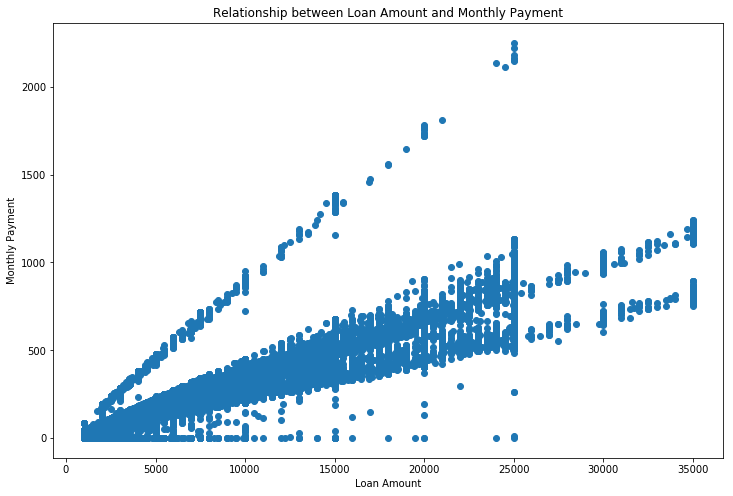

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(data=df_loan, x='LoanOriginalAmount', y='MonthlyLoanPayment')
plt.xlabel('Loan Amount')
plt.ylabel('Monthly Payment')
plt.title('Relationship between Loan Amount and Monthly Payment')

Although there are a few points that suggest higher monthly payments for a particular range of loan amounts, other points show noticeably lower monthly payments for high Loan amounts. We can clearly see a multiple positive correlation between the Monthly Payment and Loan Amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The loan original amount and the borrower APR are negatively correlated, so the higher the loan amount, the lower the APR. It also demonstrates that the APR has a wide range at various loan amounts, but that range decreases as loan amount rises. The boxplot further justifies this negative correlation by showing that median values of APR decreases with increase in Income Ranges.

>Although people with 0 dollar incomes default more frequently, the number of completed loans for income ranges of at least 100,000 dollars and 0 dollar is nearly the same. This implies that the income range is unimportant for loan repayment. Borrowers with incomes ranging from one dollar to 25,000 dollars have the lowest completed loans. The likelihood of a loan cancellation is typically very low for all income levels.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> While some points indicate higher monthly payments for a specific range of loan amounts, others show noticeably lower monthly payments for high loan amounts. There is a clear multiple positive correlation between the Monthly Payment and the Loan Amount. Also, Despite the fact that loans with 12-month terms see very little activity, borrowers tend to favor the 36-month term more frequently. Borrowers  select a term of 60 months as well.

## Multivariate Exploration



#### What is the relationship between Monthly payment, Loan amount and Term?

Text(0.5,1,'How monthly payment, Loan Amount and Term are related')

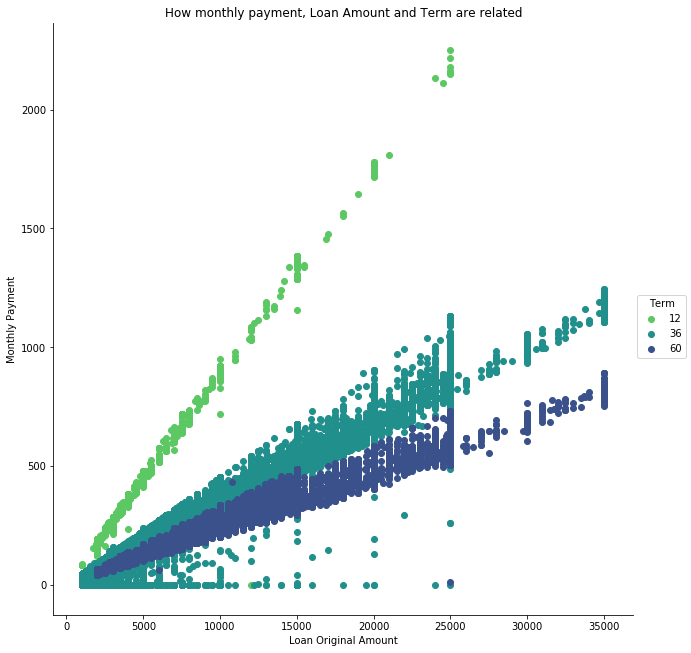

In [32]:
# plot
g = sb.FacetGrid(data=df_loan, hue='Term', size=9,palette='viridis_r')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Payment')
plt.title('How monthly payment, Loan Amount and Term are related')

Our understanding of the multiple positive correlation between the Monthly Payment and Loan Amount is improved by this multivariate plot. The length of the loan has a significant impact on the monthly payment amount. We can see that monthly payments are highest for loans with terms of 12 months and lowest for loans with terms of at least 60 months. With a longer loan term, it is safe to assume that the monthly payment will be lower.

#### What is the relationship between Monthly payment, Loan amount and Home ownership?

Text(0.5,1,'How monthly payment, Loan Amount and Term are related')

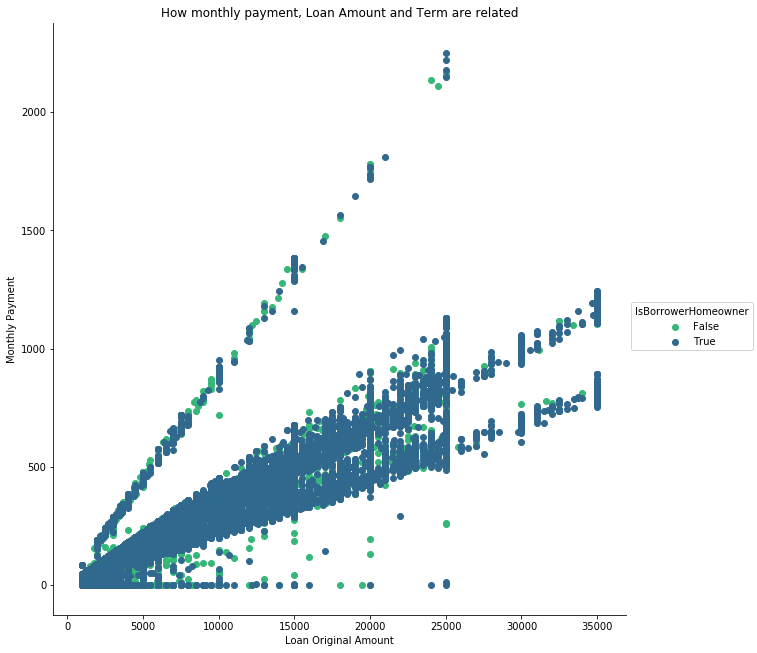

In [33]:
# plot
g = sb.FacetGrid(data=df_loan, hue='IsBorrowerHomeowner', size=9,palette='viridis_r')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Payment')
plt.title('How monthly payment, Loan Amount and Term are related')

There isn't really much evidence to proof if there is interaction of Home ownership in the relationship between Loan Amount and monthly payment

#### What is the relationship between Loan amount, Borrower APR and Term?

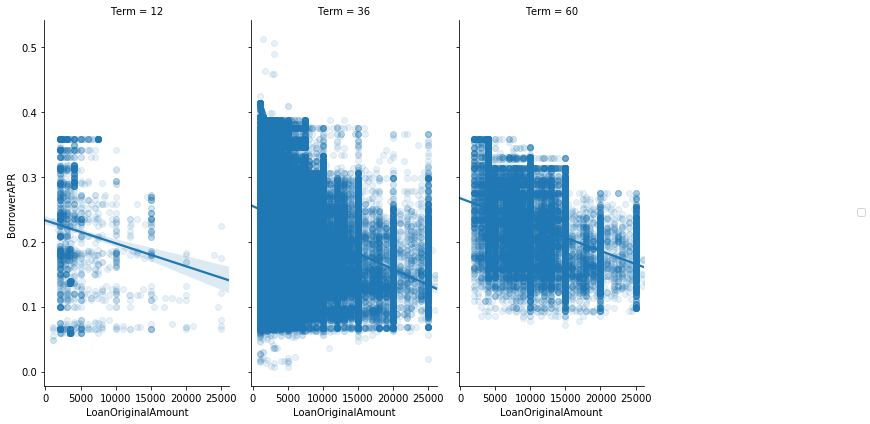

In [34]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=df_loan, aspect=0.5,size=6, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

The relationship between the loan amount and APR appears to be unaffected by the term.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This multivariate plot helps us better understand the multiple positive correlation between the Monthly Payment and Loan Amount. The amount of the monthly payment is significantly influenced by the loan's term. We can see that loans with terms of at least 60 months have the lowest monthly payments and those with terms of at least 12 months have the highest monthly payments. It is safe to assume that the monthly payment will be lower with a longer loan term.

### Were there any interesting or surprising interactions between features?

> According to the scatter plots, there does not appear to be a systematic interaction effect between the Home ownership variable, Monthly payment, and Loan Amount. However, the features are not completely independent.

## Conclusions
>I chose the Loan data set for this project that has 113,937 observations and 81 variables. Without any prior financial knowledge, it was challenging to get started with so many variables. Understanding the meaning of each variable is thus necessary before beginning any data analysis. I selected a few of the variables that I was interested in after reading the descriptions and definitions.

>I took the next step after gathering some information about each individual variable and began to investigate the relationships among variables, particularly those related variables that were of interest. The most popular type of distribution display plot is a bar and histogram plot. I used scatter plots to visualize the correlations between the variables, and I looked further into the relationships of those with stronger correlations. Adding color to the plot is a quick and easy way to demonstrate relationships between multiple variables.

> Below are few reflections from the analysis
* The two income brackets with the greatest number of borrowers are 25k-49k and 50k-74k; they both have nearly the same numbers of borrowers.
* Also, The Loan status distribution demonstrates that completed loans are highest followed by current loans in terms of importance.
* Compared to current and completed loans, the number of defaulted loans is significantly lower. Loan cancellations are extremely rare. 
* The loan original amount and the borrower APR are negatively correlated, so the higher the loan amount, the lower the APR
